In [1]:
import numpy as np
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import netwulf.interactive as interact
stylized_network, config, G = nw.load("Graph.json")

In [2]:
N = len(G.nodes)
L = len(G.edges)
degrees = np.array([d for _, d in G.degree()])

p = 2 * L /(N * (N - 1))
k = p * (N - 1)

In [3]:
G_random = nx.Graph()
N = len(G.nodes)
nodes = np.array(range(N))
G_random.add_nodes_from(nodes)
for node in G_random.nodes:
    mask = np.random.random(N) < p
    masked = nodes[mask]
    node_vector = np.ones(len(masked)) * node
    temp = np.column_stack((node_vector, masked))
    G_random.add_edges_from(temp)

In [4]:
np.max(degrees)

1283

In [5]:
degrees = [d for _, d in G.degree()]
# degrees[degrees != 0] = np.log(degrees[degrees != 0])
degrees_random = np.array([d for _, d in G_random.degree()])
degrees = np.array(degrees)

In [6]:
bins = np.logspace(start=np.log10(degrees.min()+1e-50), stop=np.log10(degrees.max()), num=10)
# widths = bins[1:] - bins[:-1]
hist = np.histogram(np.log10(degrees), bins=bins, density=True)
# hist_norm = hist[0]/widths
hist_random = np.histogram(degrees_random, bins=10, density=True)
hist, bins

/tmp/ipykernel_89590/559383276.py:3: RuntimeWarning: divide by zero encountered in log10
  hist = np.histogram(np.log10(degrees), bins=bins, density=True)


((array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00077942]),
  array([1.00000000e-50, 7.96001842e-45, 6.33618933e-39, 5.04361838e-33,
         4.01472952e-27, 3.19573210e-21, 2.54380864e-15, 2.02487636e-09,
         1.61180531e-03, 1.28300000e+03])),
 array([1.00000000e-50, 7.96001842e-45, 6.33618933e-39, 5.04361838e-33,
        4.01472952e-27, 3.19573210e-21, 2.54380864e-15, 2.02487636e-09,
        1.61180531e-03, 1.28300000e+03]))

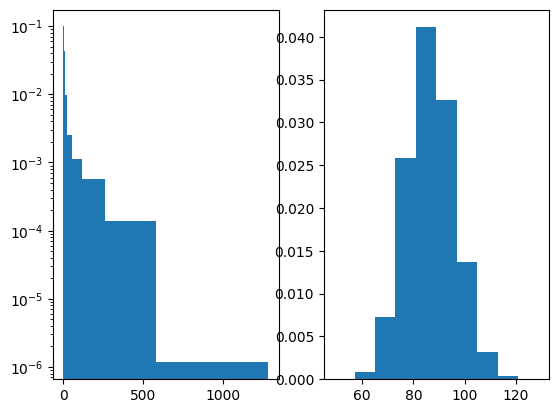

In [7]:
# Generate some sample data
data = degrees + 1

# Create logarithmically spaced bins
bins = np.logspace(start=np.log10(np.min(data)), stop=np.log10(np.max(data)), num=10)

fig, axs = plt.subplots(1, 2)
# Plot the histogram
axs[0].hist(data, bins=bins, log=True, density=True)
axs[1].hist(degrees_random, bins=10, density=True)
# Add axis labels and a title

# Show the plot
plt.show()


In [8]:
connected_largest = sorted(nx.algorithms.connected_components(G), key=len, reverse=True)[0]
G_sub = nx.Graph.subgraph(G, connected_largest)

In [9]:
import time
t = time.time()
avg_shortest_sub = nx.average_shortest_path_length(G_sub)
print(f'It took {time.time()-t} to complete: {avg_shortest_sub}')

It took 36609.047255277634 to complete: 7.248121151669367


In [10]:
avg_shortest_random = nx.average_shortest_path_length(G_random)
avg_shortest_sub

7.248121151669367

In [11]:
nx.clustering(G), nx.clustering(G_random), nx.clustering(G_sub)

({22532100: 0.3333333333333333,
  2772997: 0.11462450592885376,
  39493641: 0.06190476190476191,
  3049490: 0.16666666666666666,
  2314259: 0.03863432165318958,
  144832530: 0.16666666666666666,
  123873301: 0.05555555555555555,
  52011028: 0,
  49367064: 0.12903225806451613,
  7243805: 0.1176394054982776,
  49950751: 0.13429951690821257,
  2078464034: 0,
  2145288227: 0.14285714285714285,
  144130084: 0.03571428571428571,
  2088198191: 0,
  3543088: 0.09523809523809523,
  1691672627: 0.3723076923076923,
  1925177: 0.02913806254767353,
  2064134202: 0.3333333333333333,
  10788926: 0.015339045805564371,
  2125441089: 1.0,
  38844482: 0.224,
  2060423233: 1.0,
  2065844300: 0,
  1996878: 0.0484472049689441,
  2058192976: 0.5555555555555556,
  2097232: 0.06218487394957983,
  71774295: 0,
  2144348249: 0.1,
  3029081: 0.13157894736842105,
  8554587: 0.18095238095238095,
  1388261469: 0.6,
  2108616798: 0.3333333333333333,
  52148319: 0.4,
  150126691: 1.0,
  150892645: 0,
  2402406: 0.1433